Component 1:
Period = 10.00 s
Amplitude = 4.07
Phase = -1.56 rad

Component 3:
Period = 0.30 s
Amplitude = 1.97
Phase = 0.01 rad

Component 5:
Period = 5.00 s
Amplitude = 1.50
Phase = -1.59 rad

Component 8:
Period = 1.00 s
Amplitude = 0.99
Phase = -0.03 rad



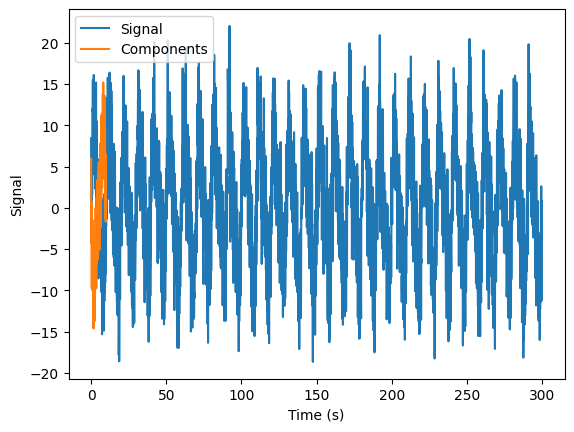

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('Prob1.csv')

# Extract the time and signal columns as numpy arrays
time = data['time'].values
signal = data['signal'].values

# Compute the Fourier transform of the signal
fft = np.fft.fft(signal)

# Compute the frequencies corresponding to each Fourier coefficient
freq = np.fft.fftfreq(signal.size, time[1] - time[0])

# Find the indices of the largest Fourier coefficients
max_indices = np.argsort(np.abs(fft))[::-1][:8]

# Extract the periods, amplitudes, and phases of the dominant components
periods = 1.0 / freq[max_indices]
amplitudes = np.abs(fft[max_indices]) / signal.size
phases = np.angle(fft[max_indices])

# Print the results
for i in range(len(periods)):
    if periods[i]> 0:
        print('Component {}:'.format(i+1))
        print('Period = {:.2f} s'.format(periods[i]))
        print('Amplitude = {:.2f}'.format(amplitudes[i]))
        print('Phase = {:.2f} rad'.format(phases[i]))
        print()

# Plot each component over the first 10 seconds
t = np.linspace(0, 10, 1000)
y = np.zeros_like(t)
for i in range(len(periods)):
    y += amplitudes[i] * np.cos(2*np.pi*t/periods[i] - phases[i])
plt.plot(time, signal, label='Signal')
plt.plot(t, y, label='Components')
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.legend()
plt.show()